In [80]:
import numpy as np
import pandas as pd

In [81]:
df = pd.read_csv('Wholesale_customers_data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [82]:
# Channel : 범주형 데이터(호텔, 레스토랑 ,카페)
# Region : 지역
# Fresh : 신선제품 지출
# Milk : 유제품에 대한 지출
# Grocery : 식료품에 대한 지출
# Frozen : 냉동제품에 대한 지출
# Detergents_Paper : 세제 및 종이
# Delicassen : 조제식품

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [84]:
# 데이터 타입
# 수치형 : 수치로 표현 가능 :    키,몸무게
# 연속형 : 연속적인(시간) : 주식,온도변화,문장내의 단어
# 이산형 : 셀수 있는 자료 : 음식점의 수, 생존자수
# 범주형 : 카테고리 항목을 나눌수있는 : 남녀, 성씨, 나이대,
# 순위형 : 순서에 의미가  : 만족도조사(매우만족,만족,모통,불만,매우불만)
# 명목형 : 범주형. 순서에 의미가 없는 

In [85]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [86]:
# Standard Scaled : 데이터의 크기가 달라서 상대적 크기의 차이에서 오는 오류를 사전에 예방

In [87]:
df['Channel'].unique() , df['Region'].unique()

(array([2, 1], dtype=int64), array([3, 1, 2], dtype=int64))

In [88]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler

In [89]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [90]:
# 얕은복사 vs 깊은복사
new_df = df.iloc[:,2:].copy()

In [91]:
ss = StandardScaler()
new_df_scaled = ss.fit_transform(new_df)

In [92]:
from sklearn.cluster import KMeans

In [93]:
# 클러스터 최적의 군집의 개수  엘보우모양이 되는 클러스터
result = []
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit(new_df_scaled)
    result.append(km.inertia_)

In [94]:
import matplotlib.pyplot as plt

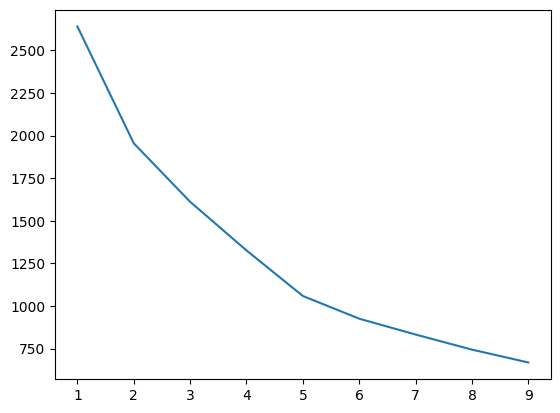

In [95]:
plt.plot(range(1,10),result)

In [96]:
# 군집은 5개의 클러스터로 구성
km = KMeans(n_clusters=5)
km.fit(new_df_scaled)

KMeans(n_clusters=5)

In [97]:
km.labels_

array([0, 1, 1, 0, 4, 0, 0, 0, 0, 1, 1, 0, 4, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       4, 1, 1, 0, 0, 0, 1, 4, 0, 0, 0, 4, 0, 1, 4, 1, 1, 4, 4, 0, 1, 1,
       1, 1, 1, 3, 1, 1, 0, 0, 4, 1, 0, 0, 3, 1, 0, 0, 0, 3, 0, 1, 0, 3,
       0, 1, 0, 0, 4, 4, 0, 4, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 3, 3, 4,
       0, 4, 0, 0, 3, 4, 1, 0, 0, 0, 0, 0, 1, 1, 0, 4, 0, 0, 1, 1, 0, 1,
       0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       4, 0, 0, 0, 0, 4, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 4, 4, 1,
       0, 0, 1, 1, 4, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 3, 0, 4, 1, 4, 0, 0, 4, 4, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 4, 0, 0, 4, 4, 0, 0, 0, 0, 4, 4, 4, 4,
       0, 0, 0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [98]:
df['cluster'] = km.labels_

In [99]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,4


In [101]:
# 시각화  
# 1. 두개 선택
# 2. PCA를 통해서 2개차원 축소

In [102]:
import seaborn as sns

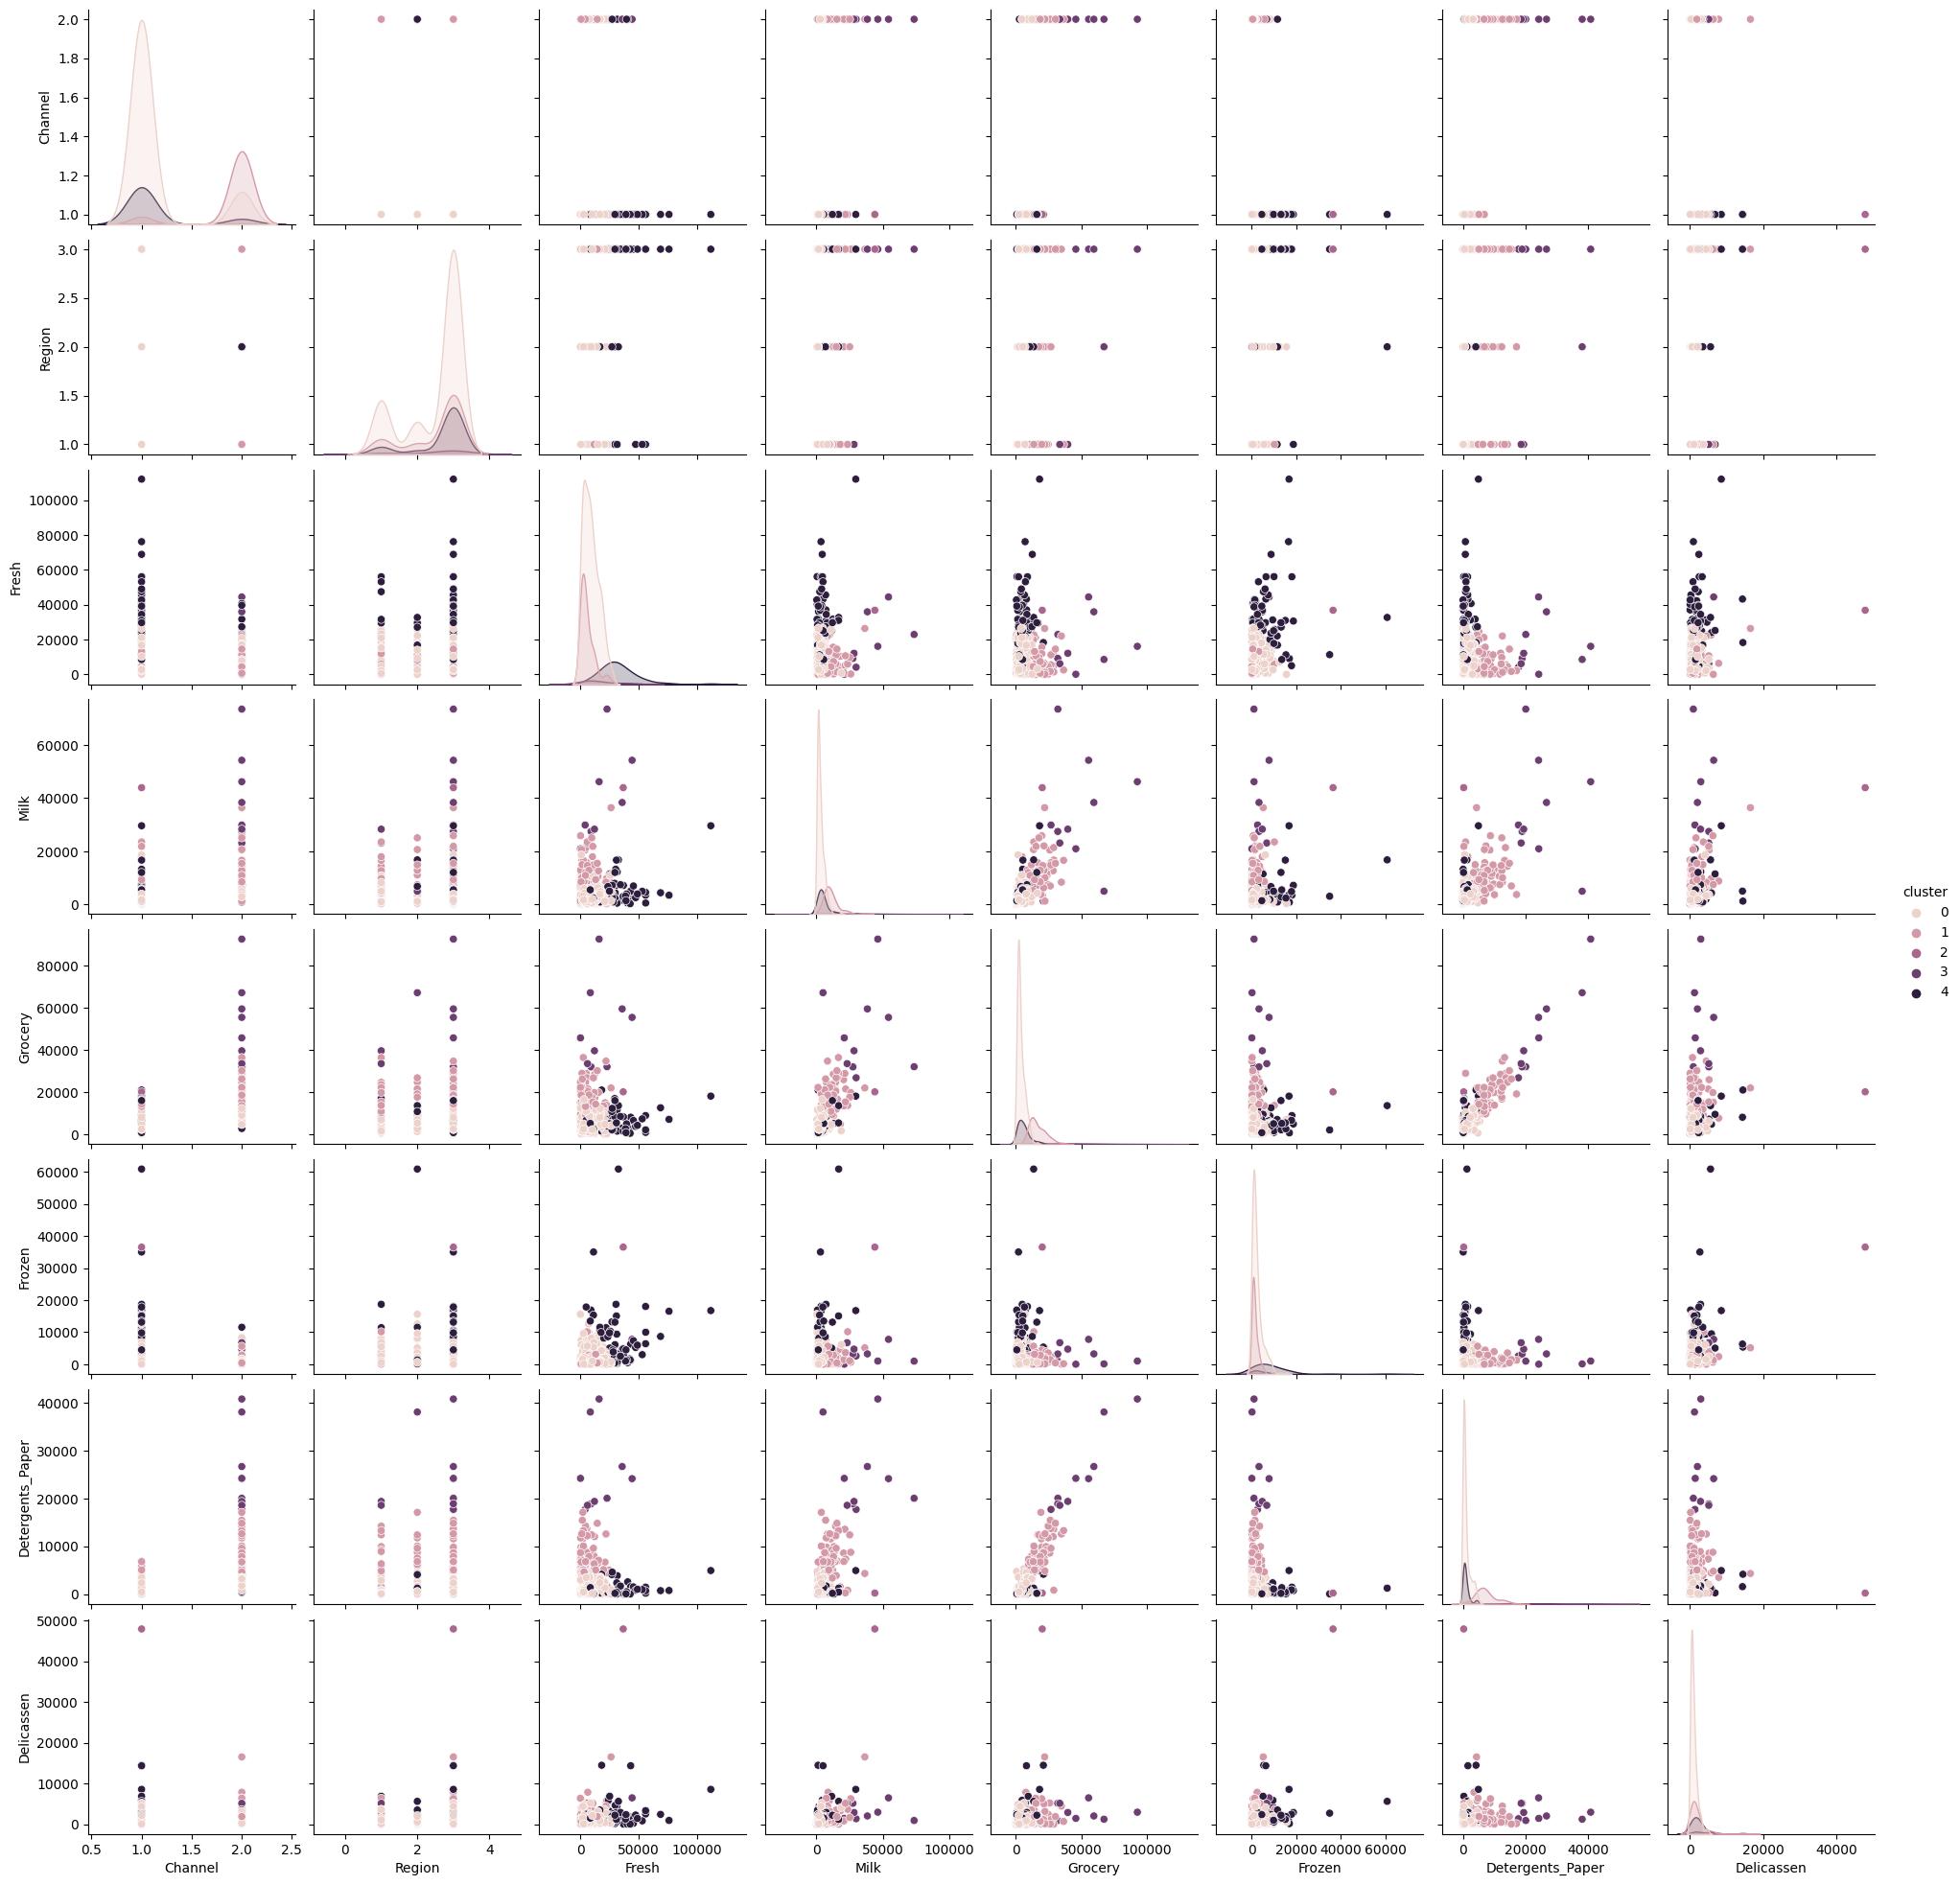

In [103]:
sns.pairplot(data=df,hue='cluster')

In [105]:
from sklearn.preprocessing import StandardScaler
ss =  StandardScaler()
new_df_scaled =  ss.fit_transform(new_df)

In [106]:
from sklearn.decomposition import PCA

In [107]:
pca =  PCA(n_components=2)
new_df_scaled_pca = pca.fit_transform(new_df_scaled)

<AxesSubplot:>

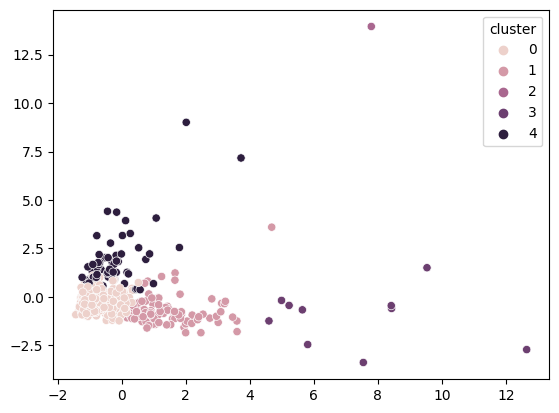

In [111]:
new_df_scaled_pca
sns.scatterplot(x=new_df_scaled_pca[:,0],y=new_df_scaled_pca[:,1],hue=df.cluster)

In [113]:
df['cluster'].value_counts()

0    270
1     96
4     63
3     10
2      1
Name: cluster, dtype: int64

<AxesSubplot:>

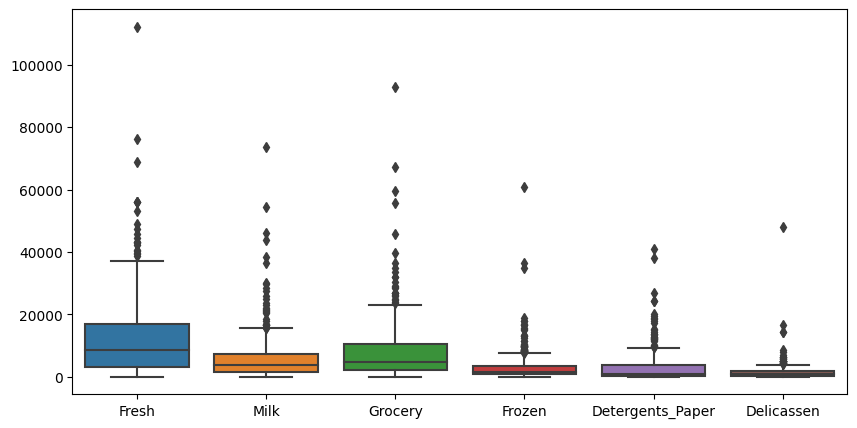

In [117]:
plt.figure(figsize=(10,5))
df.iloc[:,2:-1]
sns.boxplot(df.iloc[:,2:-1])

In [ ]:
# 각각 의 컬럼에서 이상치를 제거해서 다시 